In [ ]:
# install machine gnostics

# recommended to run in a new virtual environment

# !pip install machinegnostics

# Gnostics Cluster Analysis

ClusterAnalysis - End-to-End Clustering-Based Bound Estimation for Interval Analysis

The ClusterAnalysis class provides a high-level, automated workflow for estimating the main cluster bounds of a dataset using Gnostic Distribution Functions (GDFs) and advanced clustering analysis. It is designed for robust, interpretable, and reproducible interval estimation in scientific, engineering, and data science applications.

This class orchestrates the entire process of:

Fitting a GDF (typically ELDF/EGDF) to the data,
Assessing data homogeneity,
Performing cluster boundary detection using the DataCluster algorithm,
Returning interpretable lower and upper cluster bounds (LCB, UCB) for the main data cluster.
Key Features:

Fully automated pipeline for cluster-based bound estimation
Integrates GDF fitting, homogeneity testing, and cluster analysis
Supports both local (ELDF) and global (EGDF) GDFs
Handles weighted data, bounded/unbounded domains, and advanced parameterization
Detailed error/warning logging and reproducible parameter tracking
Optional memory-efficient operation via flushing intermediate results
Visualization support for both GDF and cluster analysis results

In [2]:
# lets take a small data set example with one outlier
import numpy as np

data = np.array([-13.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# print the data
print("Data: ", data)

Data:  [-13.5   1.    2.    3.    4.    5.    6.    7.    8.    9.   10. ]


2026-01-10 17:54:12,035 | ClusterAnalysis | WARNING | Data is not homogeneous, but 'homogeneous' parameter is set to True. User understanding for data may not be correct.
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/src/machinegnostics/magcal/gdf/cluster_analysis.py:313: UserWarning: Data is not homogeneous, but 'homogeneous' parameter is set to True. User understanding for data may not be correct.
  warnings.warn(warning_msg)
2026-01-10 17:54:12,049 | ClusterAnalysis | WARNING | Data is not homogeneous, LCB and UCB will provide bounds for the main cluster of the data.


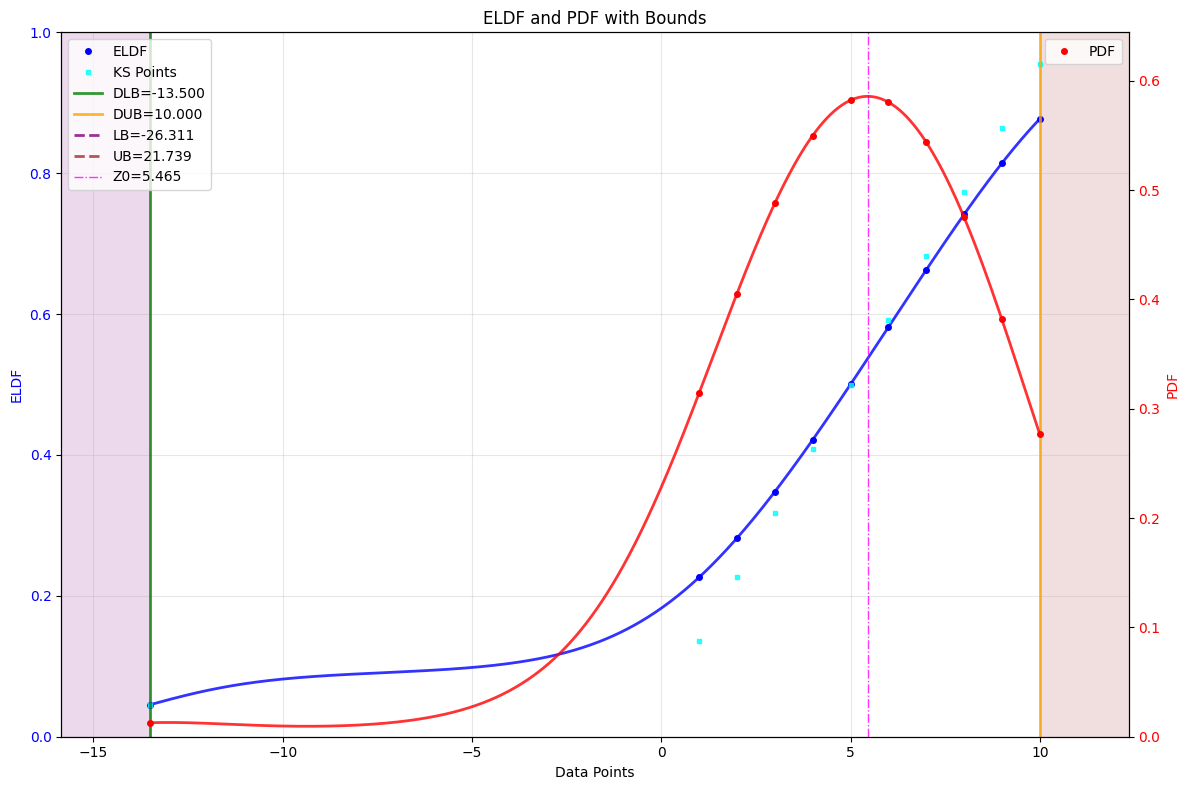

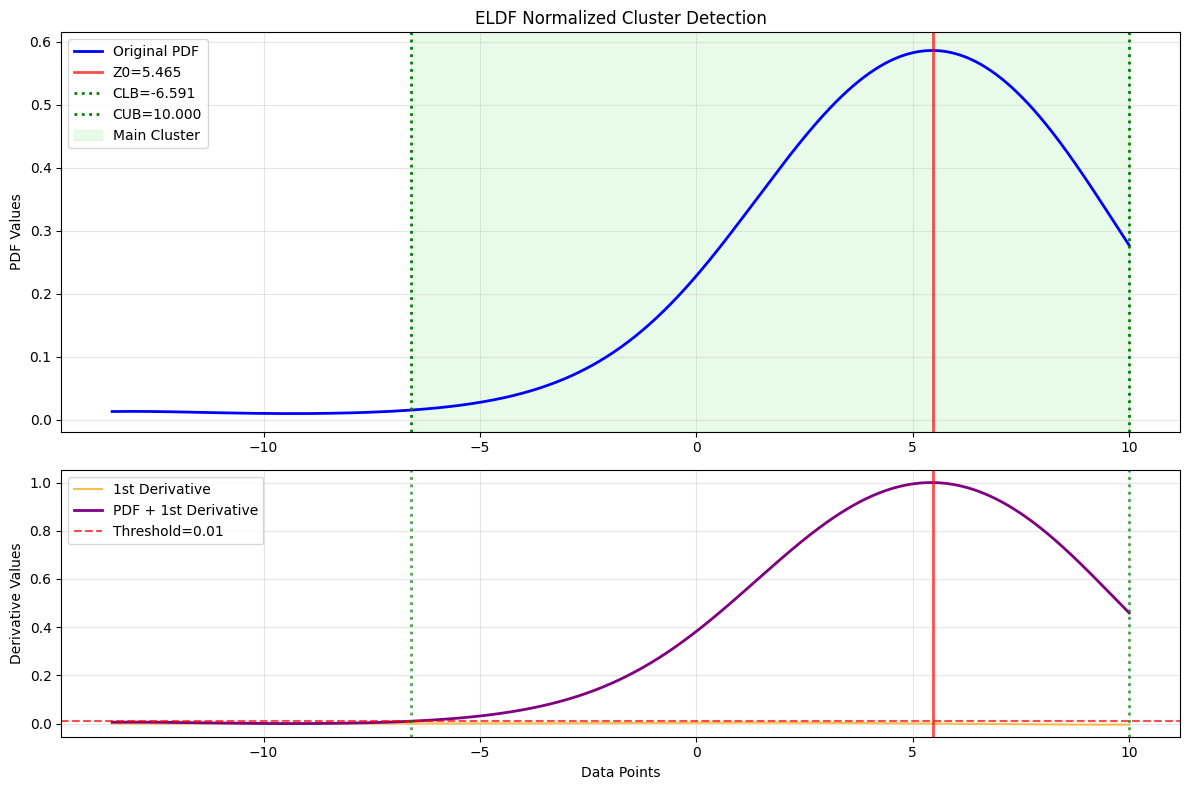

Cluster Lower Bound:  -6.591
Cluster Upper Bound:  10.0
CLB and CUB presents the bounds of the main cluster in the data.


In [3]:
# import
from machinegnostics.magcal import ClusterAnalysis

# create a ClusterAnalysis object
ca = ClusterAnalysis(verbose=False, flush=False)

# fit the data
clb, cub = ca.fit(data=data)

# plot the clusters and data
ca.plot()

# check results
ca.results()

# print the cluster bounds
print("Cluster Lower Bound: ", clb)
print("Cluster Upper Bound: ", cub)
print("CLB and CUB presents the bounds of the main cluster in the data.")

## Advanced Users

In [4]:
# Step 1: get GDF

# import
from machinegnostics.magcal import QLDF, ELDF # Local DF are good choice for cluster analysis

# create a QLDF object
qldf = QLDF()

# fit the data
qldf.fit(data=data)

# create an ELDF object
eldf = ELDF()

# fit the data
eldf.fit(data=data)


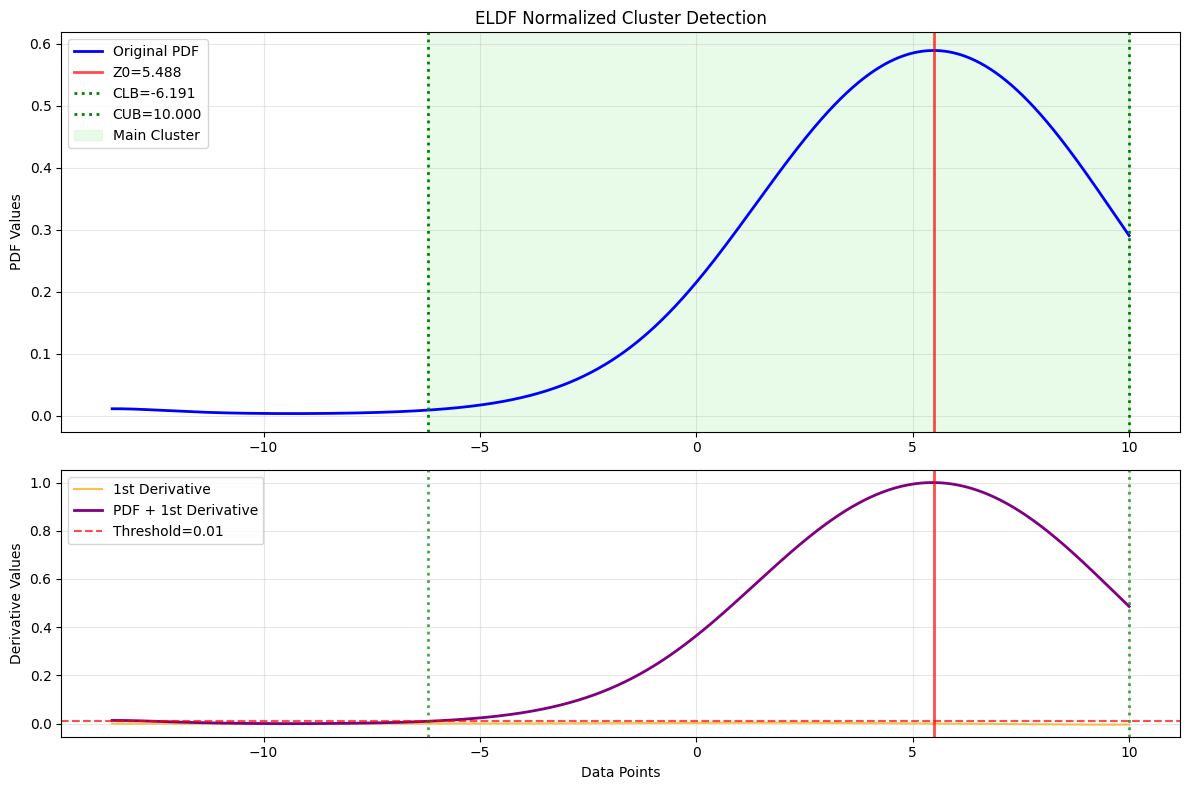

{'gdf_type': 'eldf',
 'derivative_threshold': 0.01,
 'slope_percentile': 70,
 'LCB': -6.1915,
 'UCB': 10.0,
 'Z0': 5.4879999999999995,
 'S_opt': 0.8619730662792466,
 'cluster_width': 16.191499999999998,
 'clustering_successful': True,
 'method_used': 'normalized_derivative_unified',
 'normalization_method': 'min_max_normalization',
 'errors': [],
 'warnings': []}

In [5]:
# Step 2: Manual Cluster Analysis
from machinegnostics.magcal import DataCluster

# create a DataCluster object
dc = DataCluster(gdf=eldf, verbose=False)

# fit the data
clb, cub = dc.fit(plot=True)

# check results
dc.results()


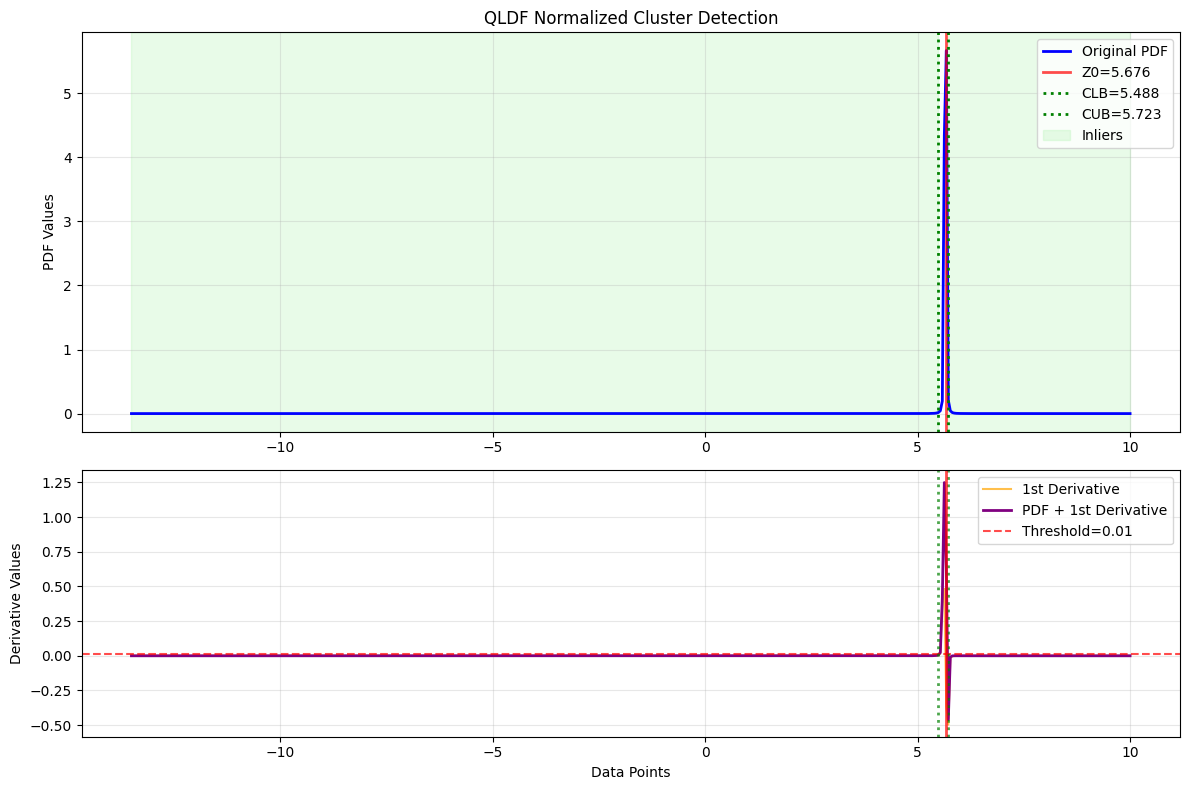

{'gdf_type': 'qldf',
 'derivative_threshold': 0.01,
 'slope_percentile': 70,
 'LCB': 5.4879999999999995,
 'UCB': 5.722999999999999,
 'Z0': 5.675999999999998,
 'S_opt': 1.9563108381514462,
 'cluster_width': 0.23499999999999943,
 'clustering_successful': True,
 'method_used': 'normalized_derivative_unified',
 'normalization_method': 'min_max_normalization',
 'errors': [],
 'warnings': []}

In [6]:
# OR #

# if analyst is interested in inliers, then
dc = DataCluster(gdf=qldf, verbose=False)

# fit the data
clb, cub = dc.fit(plot=True)

# check results
dc.results()